In [116]:
%matplotlib inline
import seaborn as sns
import numpy as np

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [87]:
ratings = """      
      0000000125  1626887   9.2  The Shawshank Redemption (1994)
      0000000125  1113913   9.2  The Godfather (1972)
      0000000124  759117   9.0  The Godfather: Part II (1974)
      0000000124  1603179   8.9  The Dark Knight (2008)
      0000000133  831174   8.9  Schindler's List (1993)
      0000000123  1274190   8.9  Pulp Fiction (1994)
      0000000133  426903   8.9  12 Angry Men (1957)
      0000000124  1170263   8.9  The Lord of the Rings: The Return of the King (2003)
      0000000123  485228   8.9  Il buono, il brutto, il cattivo (1966)
      0000000133  1292430   8.8  Fight Club (1999)
      0000000123  1193916   8.8  The Lord of the Rings: The Fellowship of the Ring (2001)
      0000000223  799800   8.7  Star Wars: Episode V - The Empire Strikes Back (1980)
      0000000133  1195053   8.7  Forrest Gump (1994)
      0000000123  1405590   8.7  Inception (2010)
      0000000123  1057644   8.7  The Lord of the Rings: The Two Towers (2002)
      0000000232  656165   8.7  One Flew Over the Cuckoo's Nest (1975)
      0000000232  701014   8.7  Goodfellas (1990)
      0000000233  1171099   8.7  The Matrix (1999)
      0000000123  221213   8.7  Shichinin no samurai (1954)
      0000000223  873651   8.6  Star Wars (1977)
      0000000232  514958   8.6  Cidade de Deus (2002)
      0000001232  982294   8.6  Se7en (1995)
      0000001232  848973   8.6  The Silence of the Lambs (1991)
      0000001123  265848   8.6  It's a Wonderful Life (1946)
      0000000232  713501   8.6  The Usual Suspects (1995)
      0000000233  400564   8.6  La vita Ë bella (1997)
      0000001232  696519   8.6  LÈon (1994)
      0000001223  208236   8.5  C'era una volta il West (1968)
      0000000223  397219   8.5  Sen to Chihiro no kamikakushi (2001)
      0000001232  845203   8.5  Saving Private Ryan (1998)
      0000000123  862010   8.5  Interstellar (2014)
      0000001223  375116   8.5  Casablanca (1942)
      0000001232  755037   8.5  American History X (1998)
      0000000223  102921   8.5  City Lights (1931)
      0000001222  405315   8.5  Psycho (1960)
      0000001222  636824   8.5  Raiders of the Lost Ark (1981)
      0000001222  304132   8.5  Rear Window (1954)
      0000000232  476425   8.5  Intouchables (2011)
      0000001222  135868   8.5  Modern Times (1936)
      0000001232  747709   8.5  The Green Mile (1999)
      0000001222  716950   8.5  Terminator 2: Judgment Day (1991)
      0000001232  476884   8.5  The Pianist (2002)
      0000001232  838678   8.5  The Departed (2006)
      0000001222  699438   8.5  Back to the Future (1985)
      0000001232  361913   8.5  Whiplash (2014)
      0000001232  815393   8.5  Memento (2000)
      0000001222  944441   8.5  Gladiator (2000)
      0000001222  435779   8.5  Apocalypse Now (1979)
      0000001232  807355   8.5  The Prestige (2006)
      0000001223  331110   8.5  Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)
      0000001222  134365   8.4  Sunset Blvd. (1950)
      0000001223  612999   8.4  The Lion King (1994)
      0000001222  541609   8.4  Alien (1979)
      0000001222  130908   8.4  The Great Dictator (1940)
      0000001232  249916   8.4  Das Leben der Anderen (2006)
      0000001223  145538   8.4  Nuovo Cinema Paradiso (1988)
      0000001232  908419   8.4  Django Unchained (2012)
      0000001222  584482   8.4  The Shining (1980)
      0000001222  115895   8.4  Paths of Glory (1957)
      0000001223  130555   8.4  Hotaru no haka (1988)
      0000001223  1091382   8.4  The Dark Knight Rises (2012)
      0000001222  685437   8.4  WALL∑E (2008)
      0000001222  794126   8.4  American Beauty (1999)
      0000001222  471198   8.4  Aliens (1986)
      0000001222  211527   8.4  Mononoke-hime (1997)
      0000001222  341048   8.4  Oldeuboi (2003)
      0000001223  288291   8.4  Citizen Kane (1941)
      0000001222  213198   8.4  North by Northwest (1959)
      0000001222  212617   8.4  Once Upon a Time in America (1984)
      0000001222  238213   8.4  Vertigo (1958)
      0000001222  162680   8.4  Das Boot (1981)
      0000001222  649039   8.3  Star Wars: Episode VI - Return of the Jedi (1983)
      0000001222   95513   8.3  M (1931)
      0000001222   59680   8.3  Witness for the Prosecution (1957)
      0000001222  515224   8.3  Le fabuleux destin d'AmÈlie Poulain (2001)
      0000001221  637779   8.3  Reservoir Dogs (1992)
      0000001222  710323   8.3  Braveheart (1995)
      0000001222  552765   8.3  Requiem for a Dream (2000)
      0000001222  535970   8.3  A Clockwork Orange (1971)
      0000001222  485953   8.3  Taxi Driver (1976)
      0000001222  519657   8.3  Toy Story 3 (2010)
      0000001222   93918   8.3  Double Indemnity (1944)
      0000001222  206052   8.3  To Kill a Mockingbird (1962)
      0000001222  185306   8.3  Lawrence of Arabia (1962)
      0000001222  641148   8.3  Eternal Sunshine of the Spotless Mind (2004)
      0000001223  250618   8.3  Deadpool (2016)
      0000001222  456977   8.3  Star Wars: Episode VII - The Force Awakens (2015)
      0000001321  465210   8.3  Full Metal Jacket (1987)
      0000001222  260767   8.3  Amadeus (1984)
      0000001222  169016   8.3  The Sting (1973)
      0000001222  144252   8.3  Singin' in the Rain (1952)
      0000001222   90189   8.3  Ladri di biciclette (1948)
      0000001123  409568   8.3  2001: A Space Odyssey (1968)
      0000001222  581108   8.3  Snatch. (2000)
      0000001222  369549   8.3  Monty Python and the Holy Grail (1975)
      0000001322  593993   8.3  Toy Story (1995)
      0000001222   63309   8.3  The Kid (1921)
      0000001222  845209   8.3  Inglourious Basterds (2009)
      0000001321  401620   8.3  L.A. Confidential (1997)
      0000001321  150033   8.3  Per qualche dollaro in pi˘ (1965)
      0000001222   98468   8.3  RashÙmon (1950)
      0000001222  104907   8.3  The Apartment (1960)
      0000001321  495534   8.3  Indiana Jones and the Last Crusade (1989)
      0000001223  145683   8.3  Jodaeiye Nader az Simin (2011)
      0000001222   80012   8.3  All About Eve (1950)
      0000001222  517690   8.3  Scarface (1983)
      0000001222  107508   8.3  Metropolis (1927)
      0000001222   71081   8.2  YÙjinbÙ (1961)
      0000001222   76356   8.2  The Treasure of the Sierra Madre (1948)
      0000001322  932838   8.2  Batman Begins (2005)
      0000001222  168968   8.2  Some Like It Hot (1959)
      0000001222  288657   8.2  Inside Out (2015/I)
      0000000124  194061   8.2  3 Idiots (2009)
      0000001221  267753   8.2  Unforgiven (1992)
      0000001331  159144   8.2  Jagten (2012)
      0000001222  109731   8.2  The Third Man (1949)
      0000001222  632196   8.2  Up (2009)
      0000001321  579470   8.2  Good Will Hunting (1997)
      0000001222  227302   8.2  Raging Bull (1980)
      0000001321   99552   8.2  Room (2015/I)
      0000001321  240325   8.2  Der Untergang (2004)
      0000001321  572435   8.2  Die Hard (1988)
      0000001222  208542   8.2  Chinatown (1974)
      0000001322  159551   8.2  The Great Escape (1963)
      0000001222  417573   8.2  Heat (1995)
      0000001222   96761   8.2  On the Waterfront (1954)
      0000001222  450964   8.2  El laberinto del fauno (2006)
      0000001222  162076   8.2  Tonari no Totoro (1988)
      0000001213   27494   8.2  Sunrise: A Song of Two Humans (1927)
      0000001222   74646   8.2  Mr. Smith Goes to Washington (1939)
      0000001223   40280   8.2  Ikiru (1952)
      0000001321  143540   8.2  The Bridge on the River Kwai (1957)
      0000001222   64807   8.2  The Gold Rush (1925)
      0000001222   74409   8.2  Ran (1985)
      0000001222  107565   8.2  Det sjunde inseglet (1957)
      0000001221  124646   8.2  El secreto de sus ojos (2009)
      0000001222  446311   8.2  Blade Runner (1982)
      0000001321  402148   8.2  Lock, Stock and Two Smoking Barrels (1998)
      0000001222   51196   8.2  The General (1926)
      0000001222   60693   8.2  Smultronst‰llet (1957)
      0000001222  203530   8.2  Hauru no ugoku shiro (2004)
      0000001321  321147   8.2  Casino (1995)
      0000001321  156613   8.2  The Elephant Man (1980)
      0000001222  319137   8.2  Warrior (2011)
      0000001222  731796   8.2  The Wolf of Wall Street (2013)
      0000001222  762242   8.2  V for Vendetta (2005)
      0000001222   42150   8.2  Judgment at Nuremberg (1961)
      0000001321  583930   8.1  A Beautiful Mind (2001)
      0000001321  543653   8.1  Gran Torino (2008)
      0000001222  516607   8.1  The Big Lebowski (1998)
      0000001222   84273   8.1  Rebecca (1940)
      0000001221  224963   8.1  The Deer Hunter (1978)
      0000001221   75463   8.1  Incendies (2010)
      0000001213  207757   8.1  Gone with the Wind (1939)
      0000001321  436712   8.1  Fargo (1996)
      0000001321  116096   8.1  Cool Hand Luke (1967)
      0000001321  453214   8.1  Trainspotting (1996)
      0000001322  462849   8.1  How to Train Your Dragon (2010)
      0000001321  101648   8.1  Dial M for Murder (1954)
      0000001222   29900   8.1  Zootopia (2016)
      0000001221  286867   8.1  The Revenant (2015)
      0000001321  680885   8.1  The Sixth Sense (1999)
      0000001222  409175   8.1  Into the Wild (2007)
      0000001321  655897   8.1  Finding Nemo (2003)
      0000001222  247526   8.1  The Thing (1982)
      0000001221  589144   8.1  No Country for Old Men (2007)
      0000001222   62116   8.1  It Happened One Night (1934)
      0000001222  113813   8.1  Mary and Max (2009)
      0000001321  534492   8.1  Gone Girl (2014)
      0000001221  708006   8.1  Kill Bill: Vol. 1 (2003)
      0000001321  296430   8.1  Rush (2013/I)
      0000001321  123100   8.1  Spotlight (2015/I)
      0000001222  484066   8.1  Mad Max: Fury Road (2015)
      0000001222  262666   8.1  Life of Brian (1979)
      0000001222  109202   8.1  The Maltese Falcon (1941)
      0000001321  255923   8.1  Hotel Rwanda (2004)
      0000001321  282097   8.1  Platoon (1986)
      0000001222  359192   8.1  There Will Be Blood (2007)
      0000001222   33938   8.1  Le salaire de la peur (1953)
      0000001222   99076   8.1  Network (1976)
      0000001321  146285   8.1  Butch Cassidy and the Sundance Kid (1969)
      0000001222   67282   8.1  Les quatre cents coups (1959)
      0000001321  261491   8.1  Stand by Me (1986)
      0000001222   58339   8.1  Persona (1966)
      0000001321  104759   8.1  In the Name of the Father (1993)
      0000001321  414610   8.1  12 Years a Slave (2013)
      0000001321  748761   8.1  Shutter Island (2010)
      0000001321  168106   8.1  Amores perros (2000)
      0000001321  444357   8.1  The Grand Budapest Hotel (2014)
      0000001222  283345   8.1  The Princess Bride (1987)
      0000001222   70280   8.1  Touch of Evil (1958)
      0000001321  464780   8.1  Million Dollar Baby (2004)
      0000001222  153692   8.1  Ben-Hur (1959)
      0000001222  185202   8.1  Annie Hall (1977)
      0000001222   60575   8.1  The Grapes of Wrath (1940)
      0000001321   77351   8.1  Relatos salvajes (2014)
      0000001222  144515   8.1  Hachi: A Dog's Tale (2009)
      0000001222   91415   8.1  Kaze no tani no Naushika (1984)
      0000001123   65271   8.1  Stalker (1979)
      0000001321  582424   8.1  Jurassic Park (1993)
      0000001221   40325   8.0  Les diaboliques (1955)
      0000001321  165311   8.0  Gandhi (1982)
      0000001213   75596   8.0  8Ω (1963)
      0000001321  469968   8.0  The Bourne Ultimatum (2007)
      0000001222  561095   8.0  Donnie Darko (2001)
      0000001222  174827   8.0  Before Sunrise (1995)
      0000001212  281213   8.0  The Wizard of Oz (1939)
      0000001222   38855   8.0  The Best Years of Our Lives (1946)
      0000001321  357693   8.0  Rocky (1976)
      0000001321   62506   8.0  Salinui chueok (2003)
      0000001222  638502   8.0  Sin City (2005)
      0000001321  639398   8.0  The Truman Show (1998)
      0000001321  576687   8.0  The Terminator (1984)
      0000001321  447301   8.0  Twelve Monkeys (1995)
      0000001321   92319   8.0  Strangers on a Train (1951)
      0000001321  557060   8.0  Monsters, Inc. (2001)
      0000001222  517586   8.0  Harry Potter and the Deathly Hallows: Part 2 (2011)
      0000001321  419840   8.0  Groundhog Day (1993)
      0000001321  384535   8.0  The Martian (2015)
      0000001321   88671   8.0  Mou gaan dou (2002)
      0000001211  396462   8.0  Jaws (1975)
      0000001222   35516   8.0  La battaglia di Algeri (1966)
      0000001222   97396   8.0  Barry Lyndon (1975)
      0000001321   99151   8.0  La haine (1995)
      0000001321  176354   8.0  Dog Day Afternoon (1975)
      0000001212   41560   8.0  Fanny och Alexander (1982)
      0000001321  157481   8.0  Yip Man (2008)
      0000001321  361609   8.0  Prisoners (2013)
      0000001222  944436   8.0  The Avengers (2012)
      0000001321  426917   8.0  The Imitation Game (2014)
      0000001321  482721   8.0  The King's Speech (2010)
      0000001222   29820   8.0  Kumonosu-jÙ (1957)
      0000001321  780266   8.0  Pirates of the Caribbean: The Curse of the Black Pearl (2003)
      0000001222  628281   8.0  Guardians of the Galaxy (2014)
      0000001321  139735   8.0  Per un pugno di dollari (1964)
      0000001321  306893   8.0  The Help (2011)
      0000001221   77450   8.0  High Noon (1952)
      0000001321   94200   8.0  Tenk˚ no shiro Rapyuta (1986)
      0000001321   96175   8.0  Roman Holiday (1953)
      0000001222   25709   8.0  La grande illusion (1937)
      0000001321  491670   8.0  Catch Me If You Can (2002)
      0000001221   71643   8.0  Notorious (1946)
      0000001222   54445   8.0  Who's Afraid of Virginia Woolf? (1966)
      0000001212  295135   8.0  Beauty and the Beast (1991)
      0000000123   41964   8.0  Gangs of Wasseypur (2012)
      0000001222   72170   8.0  Faa yeung nin wa (2000)
      0000001321   45214   8.0  Anatomy of a Murder (1959)
      0000001222   62937   8.0  The Night of the Hunter (1955)
      0000001222  101042   8.0  Akira (1988)
      0000001222  162174   8.0  Before Sunset (2004)
"""

In [102]:
ratings_dict = {}
for i, movie in enumerate(ratings.split("\n")[1:]):

    info = []
    for j, elem in enumerate(movie.split(' ')):
        if len(elem) > 0:
            info.append(elem)
    if len(info) == 0:
        continue
    
    info_dict = {}
    info_dict['distribution'] = info[0]
    info_dict['votes'] = info[1]    
    info_dict['rating'] = info[2]    
    info_dict['title'] = ' '.join(info[3:-1])
    info_dict['year'] = int(info[-1][1:-1][:4])
    ratings_dict[i] = info_dict




In [103]:
votes = [int(v['votes']) for k, v in ratings_dict.items()]
ratings_array = [float(v['rating']) for k, v in ratings_dict.items()]
mean_votes = np.mean(np.array(votes))
min_votes = np.min(np.array(votes))
mean_ratings = np.mean(np.array(ratings_array))
print('mean_votes', mean_votes)
print('min_votes', min_votes) 
print('mean_ratings',  "%.2f" % mean_ratings)

('mean_votes', 386376.03200000001)
('min_votes', 25709)
('mean_ratings', '8.26')


In [104]:
"""
weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C 

Where: 

R = average for the movie (mean) = (Rating)
v = number of votes for the movie = (votes)
m = minimum votes required to be listed in the Top 250 (currently 25,000)
C = the mean vote across the whole report

-- >>

R = WR * (v+m)/v - c*m/v
"""

m = min_votes
c = mean_ratings
real_ratings = []
ids = []
for i, d in ratings_dict.items():
    ids.append(i)
    WR = float(d['rating'])
    v = float(d['votes'])
    R = WR * (v+m)/v - c*m/v
    d['real_rating'] = R
    d['WR'] = WR
    d['v'] = v
    real_ratings.append(R)

non_weighted_rank = np.argsort(real_ratings)[::-1]
print non_weighted_rank
    

[  1   0   2   6   8   4   7   5   3  10   9  18  15  16  11  14  17  12
  13  23  25  20  26  24  22  19  21  33  38  27  36  49  44  31  28  34
  47  37  41  35  43  40  39  32  48  45  42  29  30  46  58  59  53  50
  55  70  64  68  67  69  54  66  65  63  52  57  51  61  62  56  60  73
  96 104  91  81  72 100 101 106  90 103  99  89  83  82  85  88  94  98
  92  86  87  79 102  74 105  80  78  77  93  95  75  84  71  76  97 109
 145 144 116 117 121 126 136 124 137 141 143 111 113 120 118 122 140 112
 110 127 123 114 142 131 135 115 134 119 125 108 129 133 107 132 139 138
 146 130 128 186 169 161 163 165 147 199 148 168 149 172 191 157 156 188
 154 185 162 177 170 160 189 176 173 182 175 164 151 153 193 187 192 180
 196 171 155 167 174 184 158 179 197 150 195 152 190 181 198 166 194 183
 228 232 211 210 233 212 204 215 216 240 230 203 213 229 217 220 218 227
 208 178 235 243 206 159 224 205 201 249 226 234 248 223 222 238 237 214
 219 236 202 245 241 247 209 242 246 244 225 200 20

In [105]:

print("WR    R      WR-rank   R-rank      votes     year   title:")
for i, d in ratings_dict.items():
    print("%.2f  %.2f     %3i      %3i     %8i     %s   %s" % 
          (d['WR'], d['real_rating'], i, non_weighted_rank[i], d['v'], d['year'], d['title']))


WR    R      WR-rank   R-rank      votes     year   title:
9.20  9.21       0        1      1626887     1994   The Shawshank Redemption
9.20  9.22       1        0      1113913     1972   The Godfather
9.00  9.03       2        2       759117     1974   The Godfather: Part II
8.90  8.91       3        6      1603179     2008   The Dark Knight
8.90  8.92       4        8       831174     1993   Schindler's List
8.90  8.91       5        4      1274190     1994   Pulp Fiction
8.90  8.94       6        7       426903     1957   12 Angry Men
8.90  8.91       7        5      1170263     2003   The Lord of the Rings: The Return of the King
8.90  8.93       8        3       485228     1966   Il buono, il brutto, il cattivo
8.80  8.81       9       10      1292430     1999   Fight Club
8.80  8.81      10        9      1193916     2001   The Lord of the Rings: The Fellowship of the Ring
8.70  8.71      11       18       799800     1980   Star Wars: Episode V - The Empire Strikes Back
8.70  8.71

In [109]:
years = [int(d['year']) for k, d in ratings_dict.items()]
hist(years)
show


NameError: name 'hist' is not defined

In [110]:
import matplotlib.pylab as plt

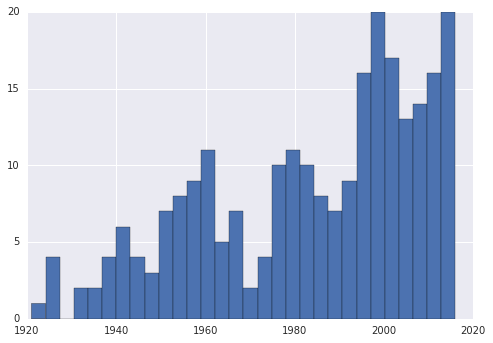

In [136]:
plt.hist(years, bins=30)
plt.show()

In [121]:
year_ratings = [float(d['WR']) for k, d in ratings_dict.items()]
year_ratings = [float(d['WR']) for k, d in ratings_dict.items()]

print(year_ratings)

[9.2, 9.2, 9.0, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.8, 8.8, 8.7, 8.7, 8.7, 8.7, 8.7, 8.7, 8.7, 8.7, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.3, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.2, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1,

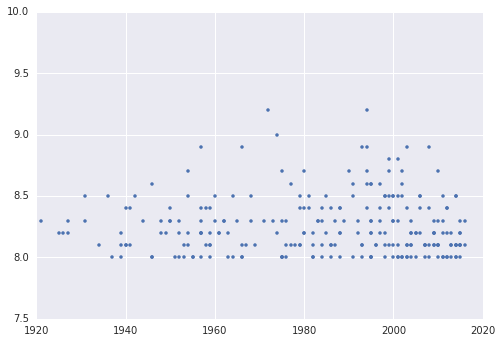

In [130]:
plt.plot(years, year_ratings, '.')
# plt.plot(years, real_ratings, 'x', color='b')

plt.ylim([7.5, 10])
plt.show()

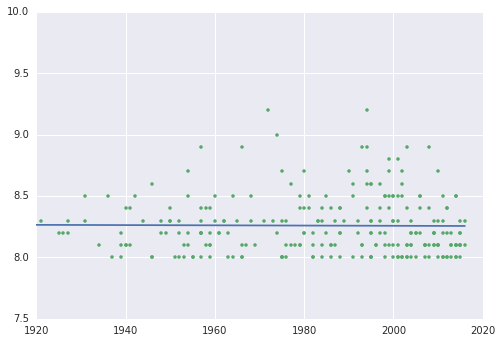

('slope ', -9.4589567665343509e-05)


In [134]:
from scipy import stats
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(years, year_ratings)
years_range = range(1920, 2017)
predict_y = [intercept + slope*year for year in years_range]
plt.plot(years_range, predict_y, '-')
plt.plot(years, year_ratings, '.')
# plt.plot(years, real_ratings, 'x', color='b')

plt.ylim([7.5, 10])
plt.show()
print('slope ', slope)